In [3]:
from google.colab import files
uploaded = files.upload()



Saving First Order Value analysis.xlsx to First Order Value analysis.xlsx


In [5]:
import pandas as pd
import io
 
df = pd.read_excel(io.BytesIO(uploaded['First Order Value analysis.xlsx']))
print(df)

    Customer Id  First Order Value  Total Order Count
0             1                 55                  2
1             2                179                  5
2             3                 32                  2
3             4                165                  4
4             5                 43                  3
..          ...                ...                ...
95           96                 34                  4
96           97                110                  2
97           98                 76                  1
98           99                190                  3
99          100                 21                  3

[100 rows x 3 columns]


In [7]:
# Create a new column with percentile rank based on first order value
df['percentile'] = pd.qcut(df['First Order Value'], 10, labels=False)

In [8]:
df.head()

,Customer Id,First Order Value,Total Order Count,percentile
0,1,55,2,2
1,2,179,5,9
2,3,32,2,1
3,4,165,4,8
4,5,43,3,1


In [10]:
# Calculate the average number of orders for each percentile group
avg_orders = df.groupby('percentile')['Total Order Count'].mean()

In [11]:
avg_orders

percentile
0    2.900000
1    3.300000
2    3.000000
3    3.666667
4    3.300000
5    2.800000
6    3.700000
7    2.800000
8    3.400000
9    3.000000
Name: Total Order Count, dtype: float64

In [12]:
# Calculate the range of order values in each percentile group
percentile_ranges = df.groupby('percentile')['First Order Value'].agg(['min', 'max'])

In [13]:
result = pd.concat([percentile_ranges, avg_orders], axis=1)
print(result)

            min  max  Total Order Count
percentile                             
0            11   23           2.900000
1            28   44           3.300000
2            45   56           3.000000
3            58   66           3.666667
4            67   80           3.300000
5            88  100           2.800000
6           108  127           3.700000
7           129  147           2.800000
8           151  169           3.400000
9           171  197           3.000000


In [14]:
percentile_ranges

,min,max
percentile,,
0,11,23
1,28,44
2,45,56
3,58,66
4,67,80
5,88,100
6,108,127
7,129,147
8,151,169


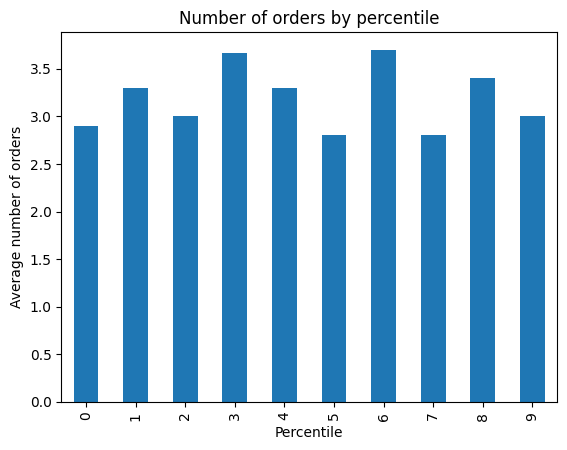

In [16]:
import matplotlib.pyplot as plt
avg_orders.plot(kind='bar')
plt.xlabel('Percentile')
plt.ylabel('Average number of orders')
plt.title('Number of orders by percentile')
plt.show()

Suggested code for CLV calculation: need to check 

import pandas as pd

# Load the dataset into a pandas dataframe
df = pd.read_csv('customers.csv')

# Calculate the average order value (AOV)
aov = df['total_order_value'].sum() / df['total_order_count'].sum()

# Calculate the repeat rate
repeat_customers = df[df['total_order_count'] > 1]['customer_id'].nunique()
total_customers = df['customer_id'].nunique()
repeat_rate = repeat_customers / total_customers

# Calculate the customer lifetime value (CLV) for each customer
df['clv'] = (df['total_order_count'] * (df['total_order_value'] - aov)) / (1 - repeat_rate)

# Print the result
print(df[['customer_id', 'clv']])